Collapse begins at density ≈ 7.66e+10 kg/m³


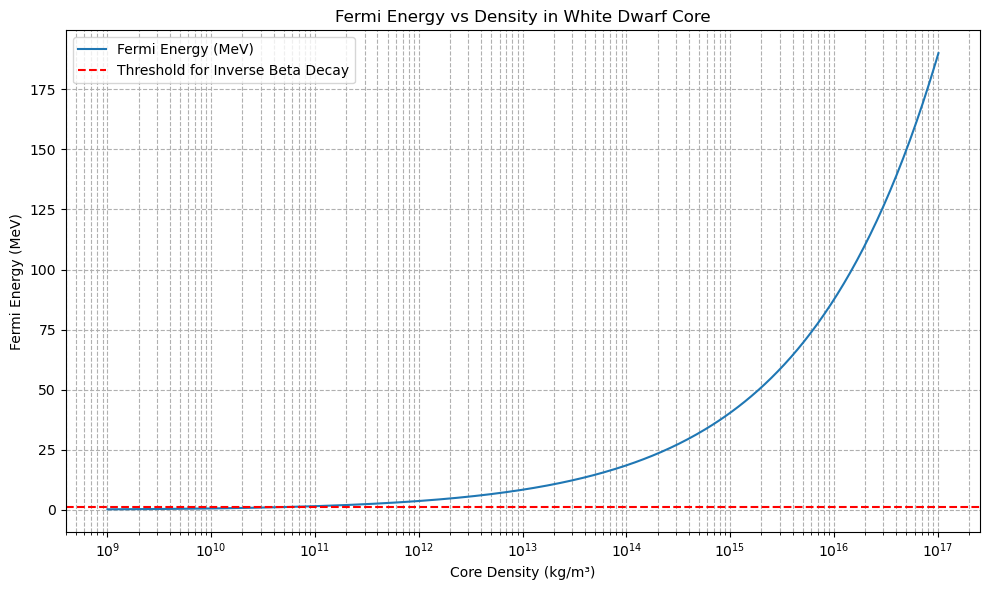

In [70]:
import numpy as np
import matplotlib.pyplot as plt

#constants

h_bar = 1.0545718e-34  # Planck's constant (Joule second)
m_e = 9.10938356e-31  # Electron mass (kg)
c = 2.998e8  # Speed of light (m/s)
MeV = 1.60218e-13  # Conversion factor

threshold = 1.293*MeV  # Threshold energy for inverse beta decay

# defining formulae
def fermi_energy(n_e):
    
    p_f = h_bar * (3 * np.pi**2 * n_e)**(1/3) 
    E_f= ( p_f**2 * c**2 + m_e**2 * c**4)**(1/2) - m_e * c**2
    return E_f

# initial parameters of the white dwarf

rho = 1e9  # Density in kg/m^3
Y_e = 0.5  # Electron fraction
m_p = 1.6726219e-27  # Proton mass (kg)

def electron_density(rho, Y_e):
    return Y_e * rho / m_p 

# empty arrays to store information and evolution
densities = []
fermi_energies = []
collapse_speeds = []
states = []

collapse_started = False

for step in range(1000):
    n_e = electron_density(rho, Y_e)
    E_f = fermi_energy(n_e)
    
    densities.append(rho)
    fermi_energies.append(E_f / MeV)  # Convert to MeV
    
    if not collapse_started:
        if E_f >= threshold:
            collapse_started = True
            print(f"Collapse begins at density ≈ {rho:.2e} kg/m³")
            states.append('Electron Capture Begins')
        else:
            states.append('Stable')
            rho *= 1.01 # Increase density by 1% each step
            collapse_speeds.append(0.01)
            continue
    
    if rho > 5e17:
        states.append('Black Hole Forms')
        break
    elif rho > 1e17:
        states.append('Neutron Star Forms')
    else:
        states.append('Collapsing')
        rho *= 1.05
        collapse_speeds.append(0.05)
        
plt.figure(figsize=(10,6))
plt.plot(densities, fermi_energies, label='Fermi Energy (MeV)')
plt.axhline(1.293, color='r', linestyle='--', label='Threshold for Inverse Beta Decay')
plt.xlabel('Core Density (kg/m³)')
plt.ylabel('Fermi Energy (MeV)')
plt.title('Fermi Energy vs Density in White Dwarf Core')
plt.grid(True, which='both', linestyle='--')
plt.legend()
plt.xscale('log')
plt.tight_layout()
plt.show()